In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
def get_data(symbols, dates):
    df = DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
    for symbol in symbols:
        df_temp = pd.read_csv(f"data/{symbol}.csv", index_col='Date',
            parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan']
            ).rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':
            df = df.dropna(subset=["SPY"])
    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

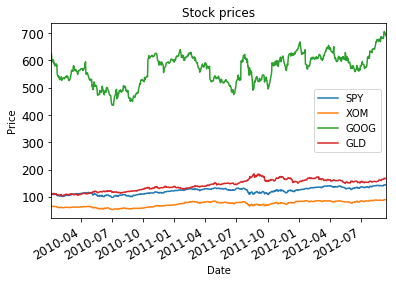

In [3]:
dates = pd.date_range('2010-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
df = get_data(symbols, dates)
plot_data(df)

In [4]:
df.std()

SPY     11.626556
XOM     10.168104
GOOG    54.068129
GLD     20.562938
dtype: float64

# Rolling Statistics

- lecture on: 1.4.4

- Idea: define a window and keep going using this window

# Bollinger Bands

- lecture on: 1.4.6
- keep an eye about volatility

In [5]:
def get_rolling_mean(df, window):
    return df.rolling(window=window).mean()

def get_rolling_std(df, window):
    return df.rolling(window=window).std()

def get_bollinger_bands(mean, std):
    two_std = 2 * std
    upperband = mean + two_std 
    lowerband = mean - two_std
    return (upperband, lowerband)

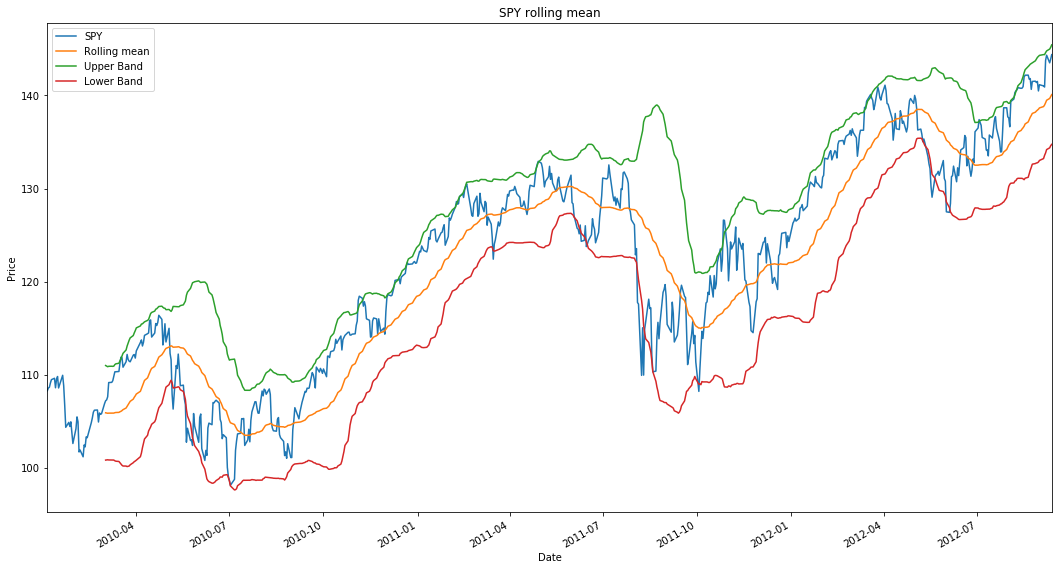

In [6]:
df_spy = df['SPY']
ax = df_spy.plot(title="SPY rolling mean", label="SPY", figsize=(18,10))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
rm_SPY = get_rolling_mean(df_spy, 40)
rm_SPY.plot(label="Rolling mean", ax=ax)

rstd_SPY = get_rolling_std(df_spy, 40)
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)

upper_band.plot(label="Upper Band", ax=ax)
lower_band.plot(label="Lower Band", ax=ax)

ax.legend(loc='upper left')



# Daily returns
- one of the most important statistics used

<img alt="1_4_1.png" src="images/1_4_1.png" width="450"> <br/>

In [7]:
def compute_daily_returns(df):
    daily_returns = df.copy()
    price_t = df[1:]
    price_t_minus_1 = df[:-1].values # so that values are not aligned by index and elementwise ops is doable
    daily_returns[1:] = (price_t / price_t_minus_1) - 1
    daily_returns.iloc[0, :] = 0
    return daily_returns

Text(0, 0.5, 'Price')

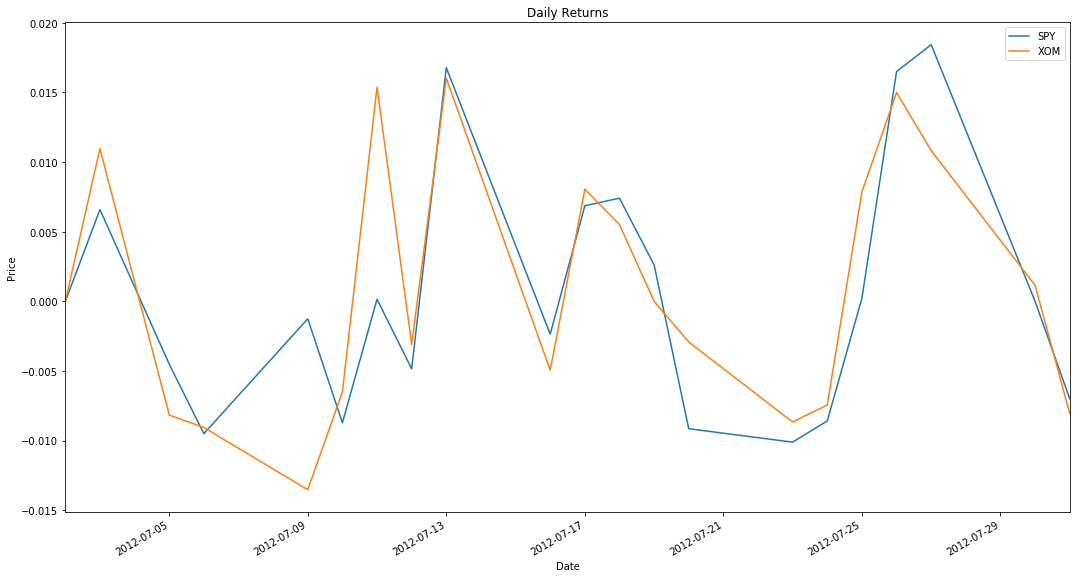

In [8]:
dates = pd.date_range('2012-07-01', '2012-07-31')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)
daily_returns = compute_daily_returns(df)
ax = daily_returns.plot(title="Daily Returns", label="SPY", figsize=(18,10))
ax.set_xlabel('Date')
ax.set_ylabel('Price')

In [9]:
a = df[1:10]
a

,SPY,XOM
2012-07-03,137.41,85.72
2012-07-05,136.79,85.02
2012-07-06,135.49,84.25
2012-07-09,135.32,83.11
2012-07-10,134.14,82.57
2012-07-11,134.16,83.84
2012-07-12,133.51,83.58
2012-07-13,135.75,84.92
2012-07-16,135.43,84.50


In [10]:
b = ( a / a.shift(1) ) - 1
b.iloc[0, :] = 0
b

,SPY,XOM
2012-07-03,0.000000,0.000000
2012-07-05,-0.004512,-0.008166
2012-07-06,-0.009504,-0.009057
2012-07-09,-0.001255,-0.013531
2012-07-10,-0.008720,-0.006497
2012-07-11,0.000149,0.015381
2012-07-12,-0.004845,-0.003101
2012-07-13,0.016778,0.016033
2012-07-16,-0.002357,-0.004946


In [11]:
def compute_daily_returns_2(df):
    daily_returns = (df / df.shift(1) ) - 1
    daily_returns.iloc[0] = 0
    return daily_returns

Text(0, 0.5, 'Price')

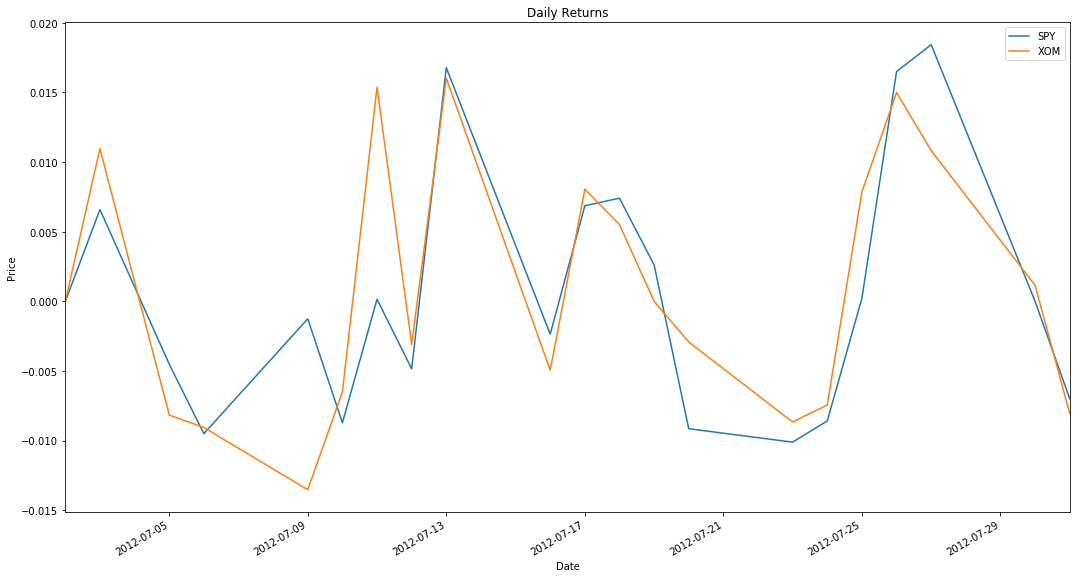

In [12]:
dates = pd.date_range('2012-07-01', '2012-07-31')
symbols = ['SPY', 'XOM']
df = get_data(symbols, dates)
daily_returns = compute_daily_returns_2(df)
ax = daily_returns.plot(title="Daily Returns", label="SPY", figsize=(18,10))
ax.set_xlabel('Date')
ax.set_ylabel('Price')